In [35]:
import numpy as np
import matplotlib.pyplot as plt
matplotlib.inline

NameError: name 'matplotlib' is not defined

In [4]:
X=np.random.normal(size=(100,2))

In [5]:
Y=np.sqrt(X[:,0] **2 + X[:, 1] ** 2)

In [6]:
plt.scatter(X[:, 0], X[:, 1], 30, c=Y)

In [7]:
from sklearn.tree import DecisionTreeRegressor

In [8]:
clf = DecisionTreeRegressor()

In [9]:
clf.fit(X, Y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [10]:
X_test = np.random.uniform(-3, 3, (1000,2))

In [11]:
plt.scatter(X_test[:, 0], X_test[:, 1], c = clf.predict(X_test))

In [12]:
x1, x2 = np.mgrid[-3:3:200j, -3:3:200j]

In [13]:
predicted = clf.predict(np.array([ x1.ravel(), x2.ravel() ]).T).reshape(x1.shape)

In [14]:
plt.pcolormesh(x1, x2, predicted)
plt.scatter(X[:, 0], X[:, 1], 30, c=Y)

In [15]:
clf = DecisionTreeRegressor(max_depth=1 )
clf.fit(X, Y)
predicted = clf.predict(np.array([ x1.ravel(), x2.ravel() ]).T).reshape(x1.shape)
plt.pcolormesh(x1, x2, predicted)
plt.scatter(X[:, 0], X[:, 1], 30, c=Y)

In [16]:
from sklearn.cross_validation import train_test_split
predicts = []
all_graphs = 0
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1)
    clf = DecisionTreeRegressor()
    clf.fit(X_train, y_train)
    predicted = clf.predict(np.array([ x1.ravel(), x2.ravel() ]).T).reshape(x1.shape)
    predicted = predicted.reshape(x1.shape)
    predicts.append(predicted)
    if all_graphs==1:
        plt.figure(i)
        plt.xlim(-3, 3)
        plt.ylim(-3, 3)
        plt.pcolormesh(x1, x2, predicted)
        plt.scatter(X[:, 0], X[:, 1], 30, c=Y)
plt.figure(11)
plt.figure(figsize=(8, 8))
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.pcolormesh(x1, x2, np.array(predicts).mean(axis=0))
plt.scatter(X[:,0], X[:, 1], 40, c=Y)
plt.colorbar()

C:\Users\Dima\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [17]:
from sklearn.datasets import load_boston

In [18]:
data = load_boston()

data.

In [19]:
print(data.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [20]:
X = data.data
Y = data.target

from  sklearn.cross_validation import load_boston

X_train, X_test, 

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [22]:
from sklearn.cross_validation import KFold, cross_val_score

In [23]:
from sklearn.grid_search import GridSearchCV

C:\Users\Dima\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [24]:
cv = KFold(X_train.shape[0], shuffle = True)
#KFold -- тип кроссвалидации

In [25]:
gs = GridSearchCV(DecisionTreeRegressor(), param_grid={'max_depth' : [2,  4, 6, 8, 10, 20, 50],
                                                      'min_samples_leaf': list(range(1, 20))}, cv=cv)

In [26]:
gs.fit(X_train, Y_train)

GridSearchCV(cv=sklearn.cross_validation.KFold(n=379, n_folds=3, shuffle=True, random_state=None),
       error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 4, 6, 8, 10, 20, 50], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [27]:
print(gs.grid_scores_)
gs.best_score_
print

[mean: 0.59902, std: 0.04029, params: {'max_depth': 2, 'min_samples_leaf': 1}, mean: 0.59902, std: 0.04029, params: {'max_depth': 2, 'min_samples_leaf': 2}, mean: 0.59902, std: 0.04029, params: {'max_depth': 2, 'min_samples_leaf': 3}, mean: 0.59902, std: 0.04029, params: {'max_depth': 2, 'min_samples_leaf': 4}, mean: 0.59902, std: 0.04029, params: {'max_depth': 2, 'min_samples_leaf': 5}, mean: 0.59902, std: 0.04029, params: {'max_depth': 2, 'min_samples_leaf': 6}, mean: 0.59902, std: 0.04029, params: {'max_depth': 2, 'min_samples_leaf': 7}, mean: 0.59902, std: 0.04029, params: {'max_depth': 2, 'min_samples_leaf': 8}, mean: 0.59902, std: 0.04029, params: {'max_depth': 2, 'min_samples_leaf': 9}, mean: 0.59902, std: 0.04029, params: {'max_depth': 2, 'min_samples_leaf': 10}, mean: 0.59902, std: 0.04029, params: {'max_depth': 2, 'min_samples_leaf': 11}, mean: 0.59935, std: 0.04075, params: {'max_depth': 2, 'min_samples_leaf': 12}, mean: 0.59902, std: 0.04030, params: {'max_depth': 2, 'min_s

<function print>

In [28]:
x = np.linspace(-1, 1)
y=x.copy()
x = x.reshape(-1,1)
plt.plot(x,y)
regr = DecisionTreeRegressor(max_depth=1)
regr.fit(x.reshape(-1, 1), y)
plt.plot(x, regr.predict(x))

In [29]:
from sklearn.ensemble import GradientBoostingRegressor

In [30]:
n_onjects = 100
x = np.linspace(-1, 1, n_onjects)
y=x.copy() + np.random.uniform(-0.5, 0.5, n_onjects)
x = x.reshape(-1,1)
plt.plot(x,y, 'o')
regr = GradientBoostingRegressor(max_depth=1, learning_rate=1, n_estimators=10, random_state=1)
regr.fit(x.reshape(-1, 1), y)
plt.plot(x, regr.predict(x), '-')

In [31]:
from sklearn.ensemble import BaggingRegressor
n_onjects = 100
x = np.linspace(-1, 1, n_onjects)
y=x.copy() + np.random.uniform(-0.5, 0.5, n_onjects)
x = x.reshape(-1,1)
plt.plot(x,y, 'o')
regr = BaggingRegressor(DecisionTreeRegressor(max_depth=None), n_estimators=1000 )
regr.fit(x.reshape(-1, 1), y)
plt.plot(x, regr.predict(x), '-')

In [32]:
from sklearn.ensemble import BaggingRegressor
n_objects = 100
x = np.linspace(-1, 1, n_onjects)
y= np.concatenate([np.array([-1] * (n_onjects // 2)), np.array([1] * (n_objects // 2)) ]) + \
np.random.uniform(-0.5, 0.5, n_objects)
x = x.reshape(-1,1)
plt.plot(x,y, 'o')
regr = BaggingRegressor(DecisionTreeRegressor(max_depth=3), n_estimators=1 )
regr.fit(x.reshape(-1, 1), y)
plt.plot(x, regr.predict(x), '-')

In [33]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target
clf = KNeighborsClassifier(1)

In [34]:
plt.scatter( X[:,0], X[:, 1], 30, y)

In [167]:
x1, x2 = np.mgrid[4:8.5:200j, 1.5:5:200j]

In [172]:
clf.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [175]:
predicts = clf.predict(np.array( [x1.ravel(), x2.ravel()] ).T)

In [176]:
predicts = predicts.reshape(x1.shape)

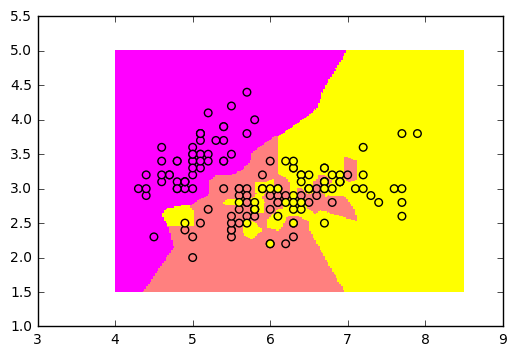

In [177]:
plt.pcolormesh(x1, x2, predicts, cmap= 'spring')
plt.scatter(X[:,0], X[:,1],30,y,cmap='spring')